In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
%matplotlib inline
import scipy.stats as stats
import statsmodels as sm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Data Load In 

In [2]:
import Scripts_SigNonSig_V2
reload(Scripts_SigNonSig_V2)
from Scripts_SigNonSig_V2 import * 

In [4]:
import warnings
warnings.filterwarnings("ignore")
out = get_data_for_sig_nonsig_analyses(version='v8b')
df_50_nonsig = out['df_50_nonsig']
df_50_sig = out['df_50_sig']
df_50 = out['df_50']


In [5]:
df_50['Accuracy.50'].std()

0.080668835939395125

In [6]:
df_50_sig['Accuracy.50'].std()

0.080327965979209756

# Boot-Strap Both Distributions

In [7]:
import Scripts_Hierarchical_Boot_V2
reload(Scripts_Hierarchical_Boot_V2)
from Scripts_Hierarchical_Boot_V2 import * 

In [9]:
hierarchical_boot(df_50,savetitle='full_v8b',save=True)

# Load Back In 

In [29]:
boot_results = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_full_v8b.npz')

In [30]:
x = np.linspace(0,1,100) # what range for cdf # 
epcdf_store = boot_results['epcdf_store']
eppdf_store = boot_results['eppdf_store']
meann = boot_results['meann']
mediann = boot_results['mediann']
meann_study=boot_results['meann_study']
prob_less_than_62 = boot_results['prob_less_than_62']
perc95 = boot_results['perc95']
mean_max = boot_results['mean_max']


# CDF and PDF Plots 

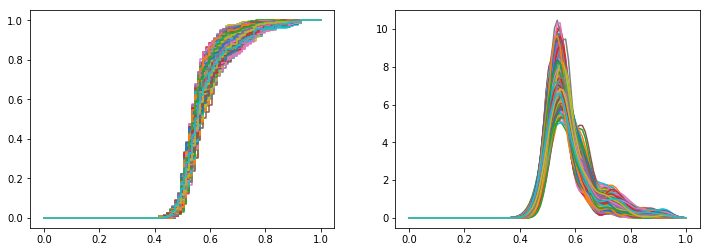

In [31]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.step(x, epcdf_store.T);
ax2.plot(x, eppdf_store.T);


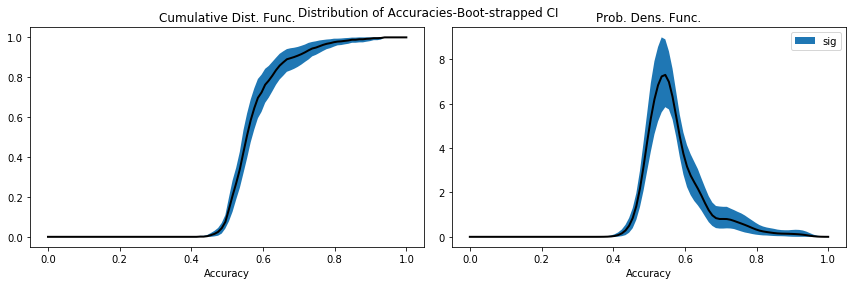

In [32]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

# cdf
upci = np.percentile(epcdf_store,97.5,axis=0)
loci = np.percentile(epcdf_store,2.5,axis=0)
ax1.plot(x,np.mean(epcdf_store,axis=0),linewidth=2,color='black')
ax1.fill_between(x,upci,loci)

##### PDF 

# significant 
upci = np.percentile(eppdf_store,97.5,axis=0)
loci = np.percentile(eppdf_store,2.5,axis=0)
ax2.plot(x,np.mean(eppdf_store,axis=0),linewidth=2,color='black')
ax2.fill_between(x,upci,loci,label='sig')


ax1.set_title('Cumulative Dist. Func.')
ax2.set_title('Prob. Dens. Func.')

ax1.set_xlabel('Accuracy')
ax2.set_xlabel('Accuracy')
plt.legend()
plt.suptitle('Distribution of Accuracies-Boot-strapped CI',fontsize=12)
plt.tight_layout()
#plt.savefig('distributions_cdf_pdf_boot_all_data.png')


In [33]:
#len(df_50_sig)

In [34]:
print('prob less than 62')
print(np.percentile(prob_less_than_62,95))
print(np.mean(prob_less_than_62))
print(np.percentile(prob_less_than_62,5))

print('mean')
print(np.percentile(meann,95))
print(np.mean(meann))
print(np.percentile(meann,5))
print(np.percentile(meann,95)-np.percentile(meann,5))

print('study mean mean')
print(np.percentile(meann_study,95))
print(np.mean(meann_study))
print(np.percentile(meann_study,5))
print(np.percentile(meann_study,95)-np.percentile(meann_study,5))

print('median')
print(np.percentile(mediann,95))
print(np.mean(mediann))
print(np.percentile(mediann,5))


print('perc95')
print(np.percentile(perc95,95))
print(np.mean(perc95))
print(np.percentile(perc95,5))

print('mean_maxes')
print(np.percentile(mean_max,95))
print(np.mean(mean_max))
print(np.percentile(mean_max,5))



prob less than 62
0.848611074257
0.784866803355
0.716698690458
mean
0.589062462625
0.574274192265
0.560417063908
0.0286453987175
study mean mean
0.596839379465
0.58252549125
0.56982051669
0.0270188627749
median
0.57
0.5543494
0.54
perc95
0.780025
0.74214585
0.7
mean_maxes
0.648790789474
0.630089289474
0.613103289474


In [35]:
np.mean(df_50['Accuracy.50']<np.mean(meann))

0.64197530864197527

In [39]:
#df_50.loc[~df_50['Accuracy.50.Median'].isnull(),['Accuracy.50','Accuracy.50.Median','Accuracy.50.original']]

In [42]:
len(df_50['PID'].unique())

76